In [4]:
# Установка пакета, если он не установлен
# install.packages("zoo")
library(zoo)

In [5]:
# install.packages("data.table")
library(data.table)
require (data.table)

In [6]:
unemp <- fread("UNRATE.csv")
print(unemp)

           DATE UNRATE
         <IDat>  <num>
  1: 1948-01-01    3.4
  2: 1948-02-01    3.8
  3: 1948-03-01    4.0
  4: 1948-04-01    3.9
  5: 1948-05-01    3.5
 ---                  
840: 2017-12-01    4.1
841: 2018-01-01    4.1
842: 2018-02-01    4.1
843: 2018-03-01    4.1
844: 2018-04-01    3.9


In [7]:
unemp [,DATE := as.Date (DATE) ]
a <- unemp [,DATE := as.Date (DATE) ]
print(a)

           DATE UNRATE
         <Date>  <num>
  1: 1948-01-01    3.4
  2: 1948-02-01    3.8
  3: 1948-03-01    4.0
  4: 1948-04-01    3.9
  5: 1948-05-01    3.5
 ---                  
840: 2017-12-01    4.1
841: 2018-01-01    4.1
842: 2018-02-01    4.1
843: 2018-03-01    4.1
844: 2018-04-01    3.9


In [8]:
setkey (unemp, DATE)

 Генерирование набора данных co случайными пропущенными значениями

In [9]:
 rand.unemp.idx <- sample (1:nrow(unemp),length(nrow(unemp)))

In [10]:
print(rand.unemp.idx)

[1] 188


In [11]:
rand.unemp <- unemp[-rand.unemp.idx]

Генерирование набора данных с пропущенными значениями для высоких уровней безработицы

In [12]:
high.unemp.idx <- which (unemp$UNRATE > 8)

In [13]:
high.unemp.idx

[1] 325 326 327 328 329 330 331 332 333 334 335 336 407 408 409 410 411 412 413
[20] 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
[39] 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752
[58] 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771
[77] 772 773 774 775 776

In [14]:
num.to.select <- .2*length(high.unemp.idx)

In [15]:
num.to.select

[1] 16.2

In [16]:
high.unemp.idx <- sample(high.unemp.idx,)

In [17]:
high.unemp.idx

[1] 767 769 328 424 329 768 737 415 422 775 430 766 773 418 411 774 332 743 751
[20] 738 748 336 739 333 408 335 742 409 331 325 407 763 412 764 771 426 421 761
[39] 734 745 327 326 330 736 772 746 750 740 413 762 741 334 759 410 420 417 752
[58] 416 744 756 414 757 419 425 429 735 776 747 758 432 765 749 428 770 755 427
[77] 760 423 431 753 754

In [18]:
bias.unemp <- unemp[-high.unemp.idx]

In [19]:
print(bias.unemp)

Key: <DATE>
           DATE UNRATE
         <Date>  <num>
  1: 1948-01-01    3.4
  2: 1948-02-01    3.8
  3: 1948-03-01    4.0
  4: 1948-04-01    3.9
  5: 1948-05-01    3.5
 ---                  
759: 2017-12-01    4.1
760: 2018-01-01    4.1
761: 2018-02-01    4.1
762: 2018-03-01    4.1
763: 2018-04-01    3.9


Чтобы создать набор данных с отсутствующими записями на основе таблиц данных с только что удаленными строками, нужно считать отсутствующие даты и значения NA, для чего лучше всего обратиться к инструментам скользящего объединения пакета data. table

In [20]:
all.dates <- seq(from = unemp$DATE[1], to = tail(unemp$DATE, 1),
by = "months")

In [21]:
print(all.dates)

  [1] "1948-01-01" "1948-02-01" "1948-03-01" "1948-04-01" "1948-05-01"
  [6] "1948-06-01" "1948-07-01" "1948-08-01" "1948-09-01" "1948-10-01"
 [11] "1948-11-01" "1948-12-01" "1949-01-01" "1949-02-01" "1949-03-01"
 [16] "1949-04-01" "1949-05-01" "1949-06-01" "1949-07-01" "1949-08-01"
 [21] "1949-09-01" "1949-10-01" "1949-11-01" "1949-12-01" "1950-01-01"
 [26] "1950-02-01" "1950-03-01" "1950-04-01" "1950-05-01" "1950-06-01"
 [31] "1950-07-01" "1950-08-01" "1950-09-01" "1950-10-01" "1950-11-01"
 [36] "1950-12-01" "1951-01-01" "1951-02-01" "1951-03-01" "1951-04-01"
 [41] "1951-05-01" "1951-06-01" "1951-07-01" "1951-08-01" "1951-09-01"
 [46] "1951-10-01" "1951-11-01" "1951-12-01" "1952-01-01" "1952-02-01"
 [51] "1952-03-01" "1952-04-01" "1952-05-01" "1952-06-01" "1952-07-01"
 [56] "1952-08-01" "1952-09-01" "1952-10-01" "1952-11-01" "1952-12-01"
 [61] "1953-01-01" "1953-02-01" "1953-03-01" "1953-04-01" "1953-05-01"
 [66] "1953-06-01" "1953-07-01" "1953-08-01" "1953-09-01" "1953-10-01"
 [71] 

In [22]:
rand.unemp = rand.unemp[J(all.dates), roll=0]

In [23]:
bias.unemp = bias.unemp[J(all.dates), roll=0]

In [24]:
 rand.unemp[, rpt := is.na(UNRATE) ]

В скользящем объединении генерируется последовательность всех дат, которые должны оставаться доступными между начальной и конечной точками набора данных. Такой подход позволяет включать в набор данных строки с отсутствующими данными — обозначенные как NA

Теперь, когда у нас есть наборы данных с отсутствующими значениями, рассмотрим несколько способов заполнения таких отсутствующих значений числами.
• Замена предыдущим значением.
• Скользящее среднее.
• Интерполяция.
Будем сравнивать производительность обозначенных методов на наборах как со случайно отсутствующими, так и с систематически пропускаемыми данными.
Поскольку оба набора данных получены из общего полного набора данных, нам будет намного проще проверить правдоподобность восполнения значений, избегая неправильных результатов. Конечно, решая реальные задачи, вы не будете располагать контрольным набором значений для проверки восполнения данных.

## Скользящее объединение
Скользящее объединение в data.table работает во многом подобно объединению данных в SQL, но только в масштабе временных рядов. Несмотря на то что таблицы далеко не всегда согласуются по заданным в них временным меткам, функция скользящего соединения обрабатывает их весьма точно.

Фрагмент data.table с данными о датах взносов

In [25]:
donations <- data.table(
amt = c(99, 100, 5, 15, 11, 1200),
dt = as.Date(c("2019-2-27", "2019-3-2", "2019-6-13",
               "2019-8-1", "2019-8-31", "2019-9-15"))
)

Информация о каждой информационной кампании


In [26]:
publicity <- data.table(identifier = c("q4q42", "4299hj", "bbg2"), dt = as.Date(c("2019-1-1","2019-4-1","2019-7-1")))


Установка первичного ключа для каждого пакета data.table


In [27]:
setkey (publicity, "dt")
setkey (donations, "dt")

# !!!!!!!!!!!!! publicity[donations, roll = True]
Нужно снабдить данные о взносах в рамках
последней кампании временными метками.
Для этого параметру roll присваивается значение TRUE

In [28]:
publicity[donations]

identifier,dt,amt
<chr>,<date>,<dbl>
NA,2019-02-27,99
NA,2019-03-02,100
NA,2019-06-13,5
NA,2019-08-01,15
NA,2019-08-31,11
NA,2019-09-15,1200


## Замена предыдущим значением
Один из самых простых способов восполнения пропущенных значений — заполнить их известными предыдущими значениями. Такой метод получил название замена предыдущим значением. Он основан на простом принципе и не требует дополнительных математических вычислений и сложных логических рассуждений.
Просто представьте, что в ходе анализа имеющихся данных вы сдвигаете время на шаг вперед — недостающие значения оказываются заполненными зарегистрированными ранее данными. При таком подходе недостающие значения восполняются преимущественно предыдущими известными измерениями.
Восполнение предыдущими значениями легко выполняется с помощью функции na.locf пакета zoo.


In [29]:
rand.unemp[, impute.ff := na.locf(UNRATE, na.rm = FALSE)]
bias.unemp[, impute.ff := na.locf(UNRATE, na.rm = FALSE)]

 Вывод графика упрощенного набора данных

NULL

NULL

NULL

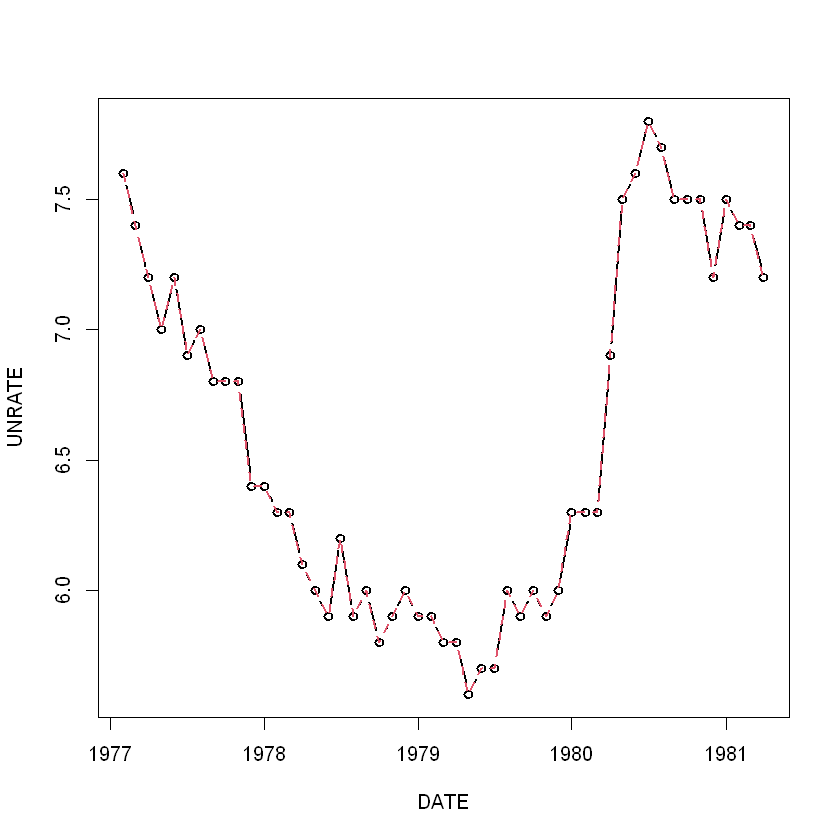

In [30]:
unemp[350:400, plot (DATE, UNRATE,
col = 1, lwd = 2, type = 'b')]
rand.unemp[350:400, lines(DATE, impute.ff,
col = 2, lwd = 2, lty = 2)]
rand.unemp[350:400][rpt == TRUE, points(DATE, impute.ff,
col = 2, pch = 6, cex = 2)]

Получился сходный временной ряд (сплошная линия) и временной ряд, построенный методом восполнения пропущенных данных (пунктирная линия). Точки, полученные заменой предыдущими значениями, отмечены символами перевернутого треугольника.

Метод замены пропущенного значения предыдущим обладает целым рядом преимуществ: он применяется к последовательным потокам данных, не требует каких бы то ни было вычислений и не вносит систематических искажений в набор значений

## Скользящее среднее
Восполнить данные можно по методу скользящего среднего или медианы. Этот метод во многом подобен методу замены отсутствующих значений предыдущими.
В обоих случаях будущие значения предсказываются по известным предыдущим значениям (восполнение можно рассматривать как специальную форму предсказания). Однако метод скользящего среднего основан на данных нескольких последних временных точек.
Существует много ситуаций, когда скользящее среднее лучше подходит для целевой задачи, чем замена пропущенного значения предыдущим. Например, если данные зашумлены и у вас есть основания полагать, что значение отдельной пропущенной точки данных очень близко к среднему уровню значений, то для его определения следует использовать метод скользящего среднего, а не замены предыдущим значением. При замене данных предыдущими значениями в них вносится случайный шум, тогда как усреднение позволяет частично от него избавиться.
Чтобы избежать упреждения, усреднение нужно выполнять исключительно для временных точек, предшествующих пропущенному значению. Следовательно, метод можно реализовать следующим образом.

##### Скользящее среднее без упреждения

In [31]:
a <- rand.unemp[, impute.rm.nolookahead := rollapply(c(NA, NA, UNRATE), 3,
    function(x) {
        if (!is.na (x[3])) x[3] else mean(x, na.rm = TRUE)
})]

In [32]:
print(a)

           DATE UNRATE    rpt impute.ff impute.rm.nolookahead
         <Date>  <num> <lgcl>     <num>                 <num>
  1: 1948-01-01    3.4  FALSE       3.4                   3.4
  2: 1948-02-01    3.8  FALSE       3.8                   3.8
  3: 1948-03-01    4.0  FALSE       4.0                   4.0
  4: 1948-04-01    3.9  FALSE       3.9                   3.9
  5: 1948-05-01    3.5  FALSE       3.5                   3.5
 ---                                                         
840: 2017-12-01    4.1  FALSE       4.1                   4.1
841: 2018-01-01    4.1  FALSE       4.1                   4.1
842: 2018-02-01    4.1  FALSE       4.1                   4.1
843: 2018-03-01    4.1  FALSE       4.1                   4.1
844: 2018-04-01    3.9  FALSE       3.9                   3.9


In [33]:
b <- bias.unemp[, impute.rm.nolookahead := rollapply(c(NA, NA, UNRATE), 3,
    function(x) {
        if (!is.na(x[3])) x[3] else mean(x, na.rm = TRUE)
})]

In [34]:
print(b)

           DATE UNRATE impute.ff impute.rm.nolookahead
         <Date>  <num>     <num>                 <num>
  1: 1948-01-01    3.4       3.4                   3.4
  2: 1948-02-01    3.8       3.8                   3.8
  3: 1948-03-01    4.0       4.0                   4.0
  4: 1948-04-01    3.9       3.9                   3.9
  5: 1948-05-01    3.5       3.5                   3.5
 ---                                                  
840: 2017-12-01    4.1       4.1                   4.1
841: 2018-01-01    4.1       4.1                   4.1
842: 2018-02-01    4.1       4.1                   4.1
843: 2018-03-01    4.1       4.1                   4.1
844: 2018-04-01    3.9       3.9                   3.9


Здесь отсутствующие значения представляются средними значениями всех предшествующих им значений (поскольку мы индексируем окончательное значение и используем это значение, чтобы определить, отсутствует ли оно и как его заменить).
Скользящее среднее не обязательно рассчитывается через среднее арифметическое предыдущих данных. Например, экспоненциально взвешенное скользящее среднее позволяет придать больший вес последним значениям и меньший вес — более отдаленным.
С другой стороны, среднее геометрическое лучше использовать во временных рядах, демонстрирующих сильную последовательную корреляцию или представленных последовательностью постоянно увеличивающихся значений.


При восполнении пропущенных данных методом скользящего среднего обязательно определитесь с тем, нужно ли принимать в расчет будущие значения, повышая риск возникновения упреждения. Если упреждение данным не грозит, то вычисление скользящего среднего лучше проводить как для прошлых, так и для будущих временных значений, максимально расширяя объем учитываемой информации и повышая точность прогнозирования значений. В подобных случаях нужно указывать диапазон или окно данных, рассматриваемых
функцией rollapply() пакета zoo.


##### Скользящее среднее с упреждением

In [35]:
a <- rand.unemp[, complete.rm := rollapply(c(NA, UNRATE, NA), 3,
    function(x){
        if (!is.na(x[2]))
            x [2]
        else
            mean(x, na.rm = TRUE)
})]

In [36]:
print(a)

           DATE UNRATE    rpt impute.ff impute.rm.nolookahead complete.rm
         <Date>  <num> <lgcl>     <num>                 <num>       <num>
  1: 1948-01-01    3.4  FALSE       3.4                   3.4         3.4
  2: 1948-02-01    3.8  FALSE       3.8                   3.8         3.8
  3: 1948-03-01    4.0  FALSE       4.0                   4.0         4.0
  4: 1948-04-01    3.9  FALSE       3.9                   3.9         3.9
  5: 1948-05-01    3.5  FALSE       3.5                   3.5         3.5
 ---                                                                     
840: 2017-12-01    4.1  FALSE       4.1                   4.1         4.1
841: 2018-01-01    4.1  FALSE       4.1                   4.1         4.1
842: 2018-02-01    4.1  FALSE       4.1                   4.1         4.1
843: 2018-03-01    4.1  FALSE       4.1                   4.1         4.1
844: 2018-04-01    3.9  FALSE       3.9                   3.9         3.9


Как указывалось выше, вычисление скользящего среднего одновременно по данным прошлых и будущих временных точек прекрасно подходит при решении задач визуализации и сбора полных, непрерывных наборов данных, но оказывается несостоятельным при составлении прогнозов.

# Подбор набора данных для восполнения недостающих значений
В процессе перекрестного анализа восполнение набора данных за счет включения в него отсутствующих точек, представленных средним или медианой, является общепринятой практикой. Хотя данный метод можно применять и по отношению к временным рядам, в большинстве случаев этого избегают.


## Интерполяция
Интерполяция — это метод определения значений отсутствующих точек данных, основанный на геометрических ограничениях поведения данных. Например, в линейной интерполяции отсутствующие данные получаются в результате линейной аппроксимации известных соседних точек.
Наибольший интерес представляет линейная интерполяция, позволяя учитывать поведение системы во времени. Например, если известно, что система изменяется линейно во времени, то для аппроксимации отсутствующих данных лучше всего применять именно линейные зависимости. В байесовском понимании такой подход позволяет получать восполняемые значения с учетом априорных сведений о них.
Как и в случае скользящего среднего, интерполяция может основываться как на прошлых, так и на будущих значениях или учитывать только одно из направлений.
Остаются справедливыми стандартные предостережения: интерполяцию по будущим значениям стоит выполнять только в том случае, когда возникающее упреждение не оказывает заметного влияния на получаемый результат.


##### Линейная интерполяция

In [37]:
a<-rand.unemp[, impute.li := na.approx(UNRATE) ]
b<-bias.unemp [, impute.li := na.approx(UNRATE) ]

In [38]:
print(a)

           DATE UNRATE    rpt impute.ff impute.rm.nolookahead complete.rm
         <Date>  <num> <lgcl>     <num>                 <num>       <num>
  1: 1948-01-01    3.4  FALSE       3.4                   3.4         3.4
  2: 1948-02-01    3.8  FALSE       3.8                   3.8         3.8
  3: 1948-03-01    4.0  FALSE       4.0                   4.0         4.0
  4: 1948-04-01    3.9  FALSE       3.9                   3.9         3.9
  5: 1948-05-01    3.5  FALSE       3.5                   3.5         3.5
 ---                                                                     
840: 2017-12-01    4.1  FALSE       4.1                   4.1         4.1
841: 2018-01-01    4.1  FALSE       4.1                   4.1         4.1
842: 2018-02-01    4.1  FALSE       4.1                   4.1         4.1
843: 2018-03-01    4.1  FALSE       4.1                   4.1         4.1
844: 2018-04-01    3.9  FALSE       3.9                   3.9         3.9
     impute.li
         <num>
  1:    

In [39]:
print(b)

           DATE UNRATE impute.ff impute.rm.nolookahead impute.li
         <Date>  <num>     <num>                 <num>     <num>
  1: 1948-01-01    3.4       3.4                   3.4       3.4
  2: 1948-02-01    3.8       3.8                   3.8       3.8
  3: 1948-03-01    4.0       4.0                   4.0       4.0
  4: 1948-04-01    3.9       3.9                   3.9       3.9
  5: 1948-05-01    3.5       3.5                   3.5       3.5
 ---                                                            
840: 2017-12-01    4.1       4.1                   4.1       4.1
841: 2018-01-01    4.1       4.1                   4.1       4.1
842: 2018-02-01    4.1       4.1                   4.1       4.1
843: 2018-03-01    4.1       4.1                   4.1       4.1
844: 2018-04-01    3.9       3.9                   3.9       3.9


##### Полиномиальная интерполяция

In [40]:
a <- rand.unemp[, impute.sp := na.spline (UNRATE) ]
b <- bias.unemp[, impute.sp := na.spline (UNRATE) ]


In [41]:
print(a)

           DATE UNRATE    rpt impute.ff impute.rm.nolookahead complete.rm
         <Date>  <num> <lgcl>     <num>                 <num>       <num>
  1: 1948-01-01    3.4  FALSE       3.4                   3.4         3.4
  2: 1948-02-01    3.8  FALSE       3.8                   3.8         3.8
  3: 1948-03-01    4.0  FALSE       4.0                   4.0         4.0
  4: 1948-04-01    3.9  FALSE       3.9                   3.9         3.9
  5: 1948-05-01    3.5  FALSE       3.5                   3.5         3.5
 ---                                                                     
840: 2017-12-01    4.1  FALSE       4.1                   4.1         4.1
841: 2018-01-01    4.1  FALSE       4.1                   4.1         4.1
842: 2018-02-01    4.1  FALSE       4.1                   4.1         4.1
843: 2018-03-01    4.1  FALSE       4.1                   4.1         4.1
844: 2018-04-01    3.9  FALSE       3.9                   3.9         3.9
     impute.li impute.sp
         <num

In [42]:
print(b)

           DATE UNRATE impute.ff impute.rm.nolookahead impute.li impute.sp
         <Date>  <num>     <num>                 <num>     <num>     <num>
  1: 1948-01-01    3.4       3.4                   3.4       3.4       3.4
  2: 1948-02-01    3.8       3.8                   3.8       3.8       3.8
  3: 1948-03-01    4.0       4.0                   4.0       4.0       4.0
  4: 1948-04-01    3.9       3.9                   3.9       3.9       3.9
  5: 1948-05-01    3.5       3.5                   3.5       3.5       3.5
 ---                                                                      
840: 2017-12-01    4.1       4.1                   4.1       4.1       4.1
841: 2018-01-01    4.1       4.1                   4.1       4.1       4.1
842: 2018-02-01    4.1       4.1                   4.1       4.1       4.1
843: 2018-03-01    4.1       4.1                   4.1       4.1       4.1
844: 2018-04-01    3.9       3.9                   3.9       3.9       3.9


In [43]:
use.idx = 90:120

NULL

NULL

NULL

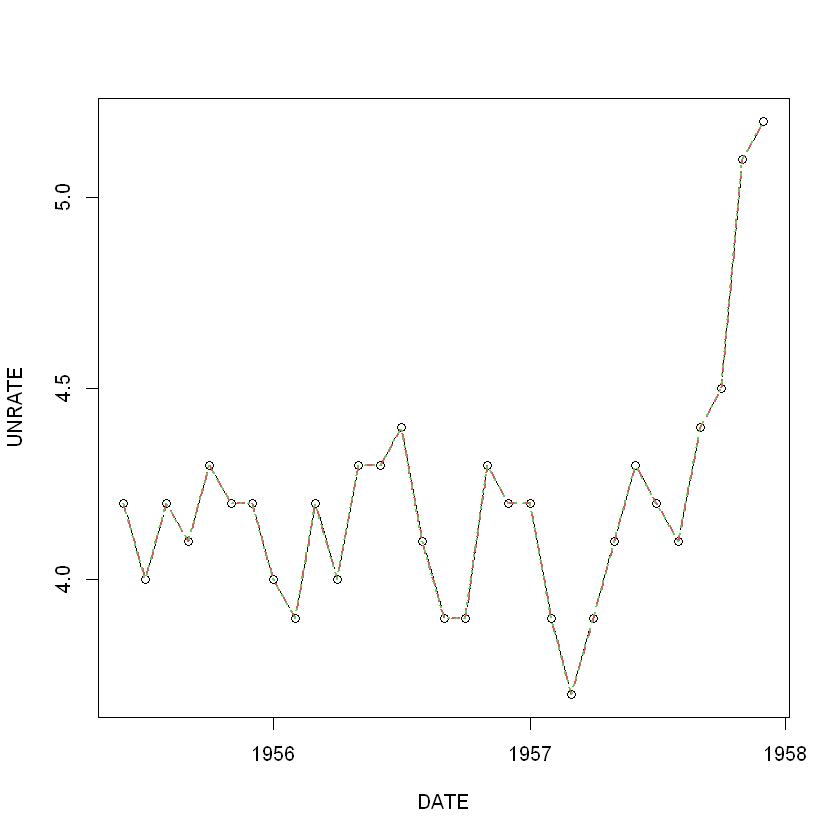

In [44]:
unemp [use.idx, plot(DATE, UNRATE, col = 1, type = 'b')]
rand.unemp[use.idx, lines(DATE, impute.li, col = 2, lwd = 2, lty = 2)]
rand.unemp[use.idx, lines(DATE, impute.sp, col = 3, lwd = 2, lty = 3)]


пунктирная линия соответствует линейной интерполяции, а точечная линия — сплайновой (полиномиальной)

Существует много ситуаций, в которых линейная (или сплайновая) интерполяция оказывается наиболее предпочтительным методом
восполнения. Например, она будет справедливой в задачах исследования средней еженедельной температуры воздуха, имеющей
тенденцию к повышению или понижению в зависимости от времени года, или ежегодных данных об объемах продаж быстро растущего
предприятия. Если из года в год объем продаж предприятия увеличивается в одно и то же количество раз, то для восполнения
отсутствующих данных лучше всего обратиться к линейной интерполяции. Иначе говоря, линейная интерполяция учитывает тенденции
в данных, чего не скажешь об описанном выше методе скользящего среднего. В частности, если в данных просматривается тенденция
к увеличению значения, то при использовании метода скользящего среднего восполняемые значения систематически недооценивались бы.
Однако учтите, что существует много ситуаций, в которых линейная (или сплайновая) интерполяция не находит достойного применения.
Например, такому восполнению не подлежат пропущенные в наборе метеорологических данных сведения об осадках — изменение их
количества происходит далеко не по линейному закону. Точно так при восполнении нескольких временных точек в наборе данных о
суточном режиме сна нужно предельно настороженно отнестись к идее экстраполяции данных между двумя известными значениями.
Например, одна из таких временных точек может относиться к бессонной ночи, а следующая — обозначать 30-минутную дремоту.
Правильно оценить недостающие данные по ним будет крайне сложно.

# Сравнение методов
Рассмотрев несколько различных методов восполнения, можно протестировать их на готовых наборах данных и сравнить полученные результаты.
Ранее мы создали два неполных набора данных, в одном из которых отсутствующие значения выбирались случайным образом, а в другом — в наиболее неудовлетворительных точках, соответствующих высокому уровню безработицы.
Сравнивая методы с позиции точности получаемых результатов, несложно заметить, что у них разные среднеквадратические ошибки.

In [45]:
rand.unemp[, lapply(.SD,function(x){mean((x - unemp$UNRATE)^2,
na.rm = TRUE)}), .SDcols = c("impute.ff",
"impute.rm.nolookahead", "impute.li",
"impute.sp")]


impute.ff,impute.rm.nolookahead,impute.li,impute.sp
<dbl>,<dbl>,<dbl>,<dbl>
4.739336e-05,4.739336e-05,2.665877e-05,4.29766e-05


In [46]:
bias.unemp [ , lapply(.SD, function (x) mean((x - unemp$UNRATE)^2, na.rm = TRUE)), .SDcols = c("impute.ff",
"impute.rm.nolookahead", "impute.li",
"impute.sp") ]

impute.ff,impute.rm.nolookahead,impute.li,impute.sp
<dbl>,<dbl>,<dbl>,<dbl>
0.2318483,0.005572172,0.2163562,0.02323485


во многих рассмотренных выше методах возникает упреждение. Единственные методы, в которых оно не наблюдается, — замены пропущенного значения предыдущим и скользящего среднего без упреждения (в отличие от скользящего среднего с упреждением). Совершенно неудивительно, что они обладают разными среднеквадратичными ошибками, а методы без упреждения не столь точны, как остальные.

## Последние замечания
Выше рассмотрены простейшие и наиболее часто используемые методы восполнения отсутствующих данных временных рядов. Восполнение данных остается важной областью исследований дисциплины анализа данных. Чем важнее принимаемые решения, тем тщательнее нужно изучать возможные причины пропуска данных и последствия их восполнения. Ниже приведено несколько действенных советов по заполнению отсутствующих данных.
• Невозможно доказать, что в наборе отсутствуют действительно случайные данные, и тем более маловероятно, что их исключение из набора предопределяется естественными причинами.
• Иногда, но далеко не всегда, отсутствие отдельного измерения можно объяснить моделью. Широкие наборы данных со многими показателями — наилучшее средство для исследования закономерностей в пропущенных данных рассматриваемой модели. Тем не менее они не очень часто подвергаются анализу методами анализа временных рядов.
• Чтобы понять причины и масштабы неопределенности, вызванной восполнением набора данных отсутствующими значениями, необходимо проанализировать несколько сценариев и пообщаться с как можно большим количеством людей, вовлеченных в процесс сбора данных.
• Способ включения в набор недостающих данных должен учитывать их назначение.


# Понижение и повышение частоты дискретизации
Очень часто связанные временные ряды, полученные из разных источников данных, имеют неодинаковую частоту дискретизации. Это одна из многих причин, по которым вам придется изменять частоту дискретизации рядов данных, подвергаемых анализу. Разумеется, вы не можете изменить фактическую частоту сбора информации, но вам вполне по силам изменить частоту указания временных меток в исходном наборе. Такая операция называется понижением или повышением частоты дискретизации временных меток.
Понижение частоты дискретизации — это выбор подмножества данных, временные метки которых имеют меньшую частоту, чем в исходном временном ряду. Повышение частоты дискретизации позволяет получить наборы данных, которые якобы собирались чаще, чем на самом деле.
Понижение частоты дискретизации
Каждый раз, понижая частоту выборки данных, вы уменьшаете частоту дискретизации.
Чаще всего это делается в следующих случаях. Исходное разрешение данных слишком большое. Существует целый ряд причин, по которым высокая детализация данных не имеет смысла. Например, вы измеряете некий показатель чаще, чем того требует модель данных.


Предположим, у вас есть набор данных о температуре воздуха, измеряемой каждую секунду. Исторический опыт (и здравый смысл) подсказывает, что измерения выполнялись слишком часто, и, скорее всего, набор данных включает слишком много повторяющейся информации, приводящей к дополнительной нагрузке на системы хранения и обработки данных. Более того, погрешность измерения может быть сопоставимой с посекундной вариацией температуры воздуха. В хранении чрезмерно больших и неинформативных наборов данных очень мало смысла. Уменьшение частоты дискретизации в таких наборах данных с регулярной выборкой сводится к выбору всех n-х элементов.
Выделение сезонных данных. Вместо того чтобы учитывать сезонность данных в общем временном ряду, образуйте частичный временной ряд, включающий данные только одного сезона. В следующем примере показан процесс понижения частоты дискретизации при образовании частичного временного ряда январских измерений, образованного из первоначального временного ряда ежемесячных данных. Как видите, теперь данные выбираются с годовой частотой.


In [47]:
unemp[seq.int(from = 1, to = nrow(unemp), by = 12)]

DATE,UNRATE
<date>,<dbl>
1948-01-01,3.4
1949-01-01,4.3
1950-01-01,6.5
1951-01-01,3.7
1952-01-01,3.2
1953-01-01,2.9
1954-01-01,4.9
1955-01-01,4.9
1956-01-01,4.0


Сравнение с более низкочастотными данными. Уменьшить частоту дискретизации данных может понадобиться при сопоставлении их с данными с заметной меньшей частотой выборки. В подобных случаях данные сначала подвергаются агрегации и только затем из них удаляются определенные временные точки. Агрегация может заключаться в такой простой операции, как усреднение или суммирование, или же представлять более сложное действие, подобное вычислению взвешенного среднего, в котором измеряемая величина характеризуется другими весовыми значениями в разных временных точках. Ранее в наборе данных о добровольных взносах нам уже доводилось выполнять понедельное суммирование значений, поскольку именно такая общая сумма взносов представляет интерес для дальнейшего анализа.
Напротив, в наборах экономических данных интерес будут представлять среднегодовые значения. В следующем примере мы будем рассчитывать среднюю величину вместо скользящей средней, подчеркивая актуальность веса среднеарифметического, а не последнего годичного значения (обратите внимание на различия в восполнении данных). В процессе группировки даты приводятся к строковому формату — обработка значений года является прекрасным примером использования SQL-подобных команд для обработки временных рядов.


In [48]:
unemp[, mean (UNRATE), by = format(DATE, "%Y")]

format,V1
<chr>,<dbl>
1948,3.750000
1949,6.050000
1950,5.208333
1951,3.283333
1952,3.025000
1953,2.925000
1954,5.591667
1955,4.366667
1956,4.125000


## Повышение частоты дискретизации
Повышение частоты выборки — это намного больше, чем операция, обратная понижению частоты дискретизации. Такое преобразование имеет отдельный смысл: в реальном мире уменьшение частоты измерений воспринимается вполне естественно, а вот повышение частоты выборки без увеличения количества измерений представляется безосновательной попыткой получения готового результата.


Нерегулярные временные ряды. Одна из распространенных причин повышать частоту дискретизации заключается в необходимости получения регулярного ряда данных из нерегулярного временного ряда. Такое преобразование невозможно без увеличения частоты дискретизации, поскольку исходные данные конвертируются в данные, которые были собраны с заведомо большей частотой выборки. Если это ваш случай, то для повышения частоты дискретизации нужно воспользоваться функцией скользящего объединения языка R, как это делалось при заполнении отсутствующих значений экономического набора данных.

In [49]:
all.dates <- seq(from = unemp$DATE[1], to = tail(unemp$DATE, 1),
by = "months")

In [50]:
daily.unemployment = unemp[J(all.dates), roll = 31]
daily.unemployment


DATE,UNRATE
<date>,<dbl>
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
1948-06-01,3.6
1948-07-01,3.6
1948-08-01,3.9
1948-09-01,3.8


##### ....

данные легко разложить на сезонную, трендовую и остаточную составляющие с помощью единственной команды языка R, как показано ниже

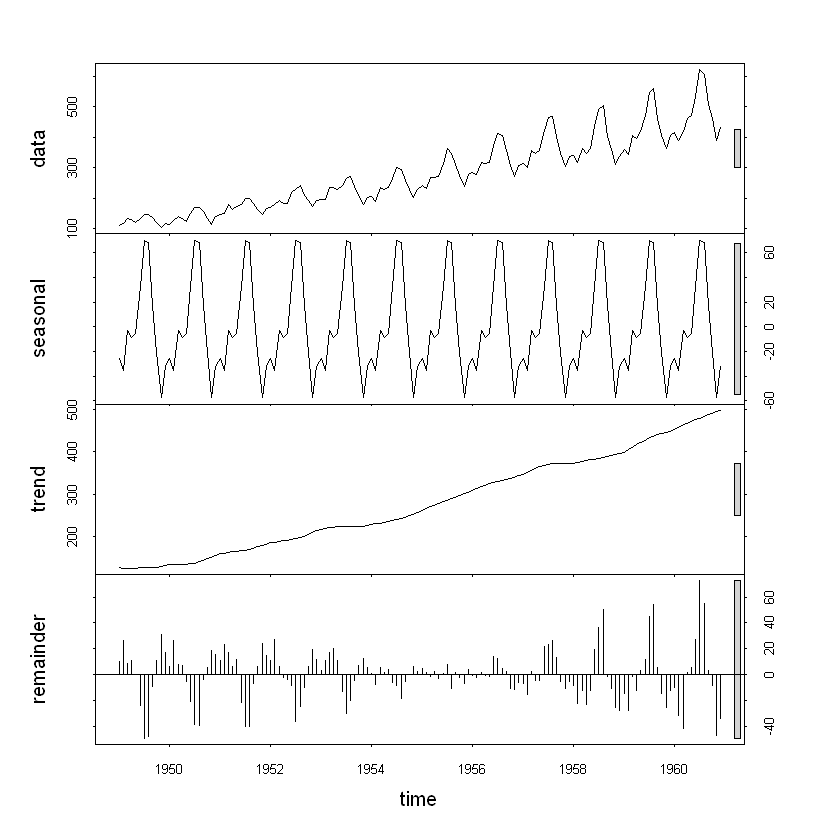

In [51]:
plot(stl(AirPassengers, "periodic"))

Полученный график предельно точно отражает исходные данные (рис. 12). Чтобы получить исходный ряд, достаточно объединить данные сезонной, трендовой и остаточной составляющих. Заметьте, что в данном разложении учитывается аддитивность, а не мультипликативность сезонных изменений данных, поскольку остаточная компонента вносит наибольший вклад в начале и конце временного ряда